## Classification and Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. 

- Work with the `Wisconsin Breast Cancer Dataset` from the UCI machine learning repository. 
- Predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

    - The dataset needs to split into 80% train and 20% test. 
    - The feature matrices are assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test` where class 1 corresponds to a `malignant` tumor and class 0 corresponds to a `benign` tumor. 
    - To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import matplotlib.pyplot as plt
SEED=1

In [100]:
wbc = pd.read_csv('wbc.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [101]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
#See the first 5 predictions
print(y_pred[0:5])

[1 0 0 1 0]


In [103]:
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.2f}'.format(acc))

Test set accuracy: 0.89


In [104]:
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
        
    fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

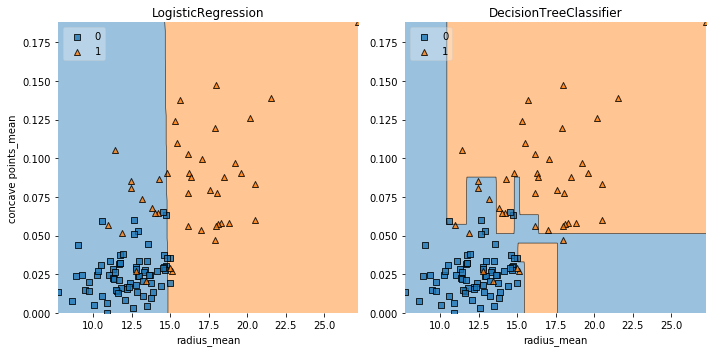

In [105]:
# Import LogisticRegression from sklearn.linear_model

from mlxtend.plotting import plot_decision_regions
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

In [106]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier( max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [107]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

### Entropy vs Gini index

In [108]:

y_pred_entropy= dt_entropy.predict(X_test)
y_pred_gini=dt_gini.predict(X_test)

# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini=accuracy_score(y_test, y_pred_gini)

# Print accuracy
print('Accuracy achieved by using entropy: ', accuracy_entropy)
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using the gini index:  0.8859649122807017


> the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the `DecisionTreeClassifier` model of `scikit-learn`.

#### Regression tree
train a regression tree to predict the `mpg` (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

In [109]:
mpg = pd.read_csv('auto.csv')
mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [110]:
mpg = pd.get_dummies(mpg)
mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [111]:
X = mpg.drop('mpg', axis=1)
y = mpg['mpg']

In [112]:
X.head()

,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0


In [113]:
y.head()

0    18.0
1     9.0
2    36.1
3    18.5
4    34.3
Name: mpg, dtype: float64

In [114]:

dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))


Test set RMSE of dt: 0.27


In [115]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = MSE(y_test, y_pred_lr)
rmse_lr = mse_lr**(1/2)

print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 0.31
Regression Tree test set RMSE: 0.27
